<a href="https://colab.research.google.com/github/LeVraisPeg/LLM_init/blob/main/MyLLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mini projet : Système de Questions-Réponses avec Classement de Qualité

**Objectif** : Créer un système qui utilise un LLM pour répondre à des questions sur un domaine spécifique et évaluer la qualité des réponses.

**Durée estimée** : 3-4 heures

**Description du projet** :
1. **Créer un dataset de questions-réponses** : Définir 10-15 questions sur un domaine de votre choix (technologie, cinéma, histoire, etc.) avec leurs réponses de référence
2. **Tester différentes approches de prompt** :
    - Zero-shot
    - One-shot
    - Few-shot
3. **Comparer les paramètres de génération** : Tester différentes combinaisons de température, top_k, top_p pour voir leur impact
4. **Évaluation automatique** : Créer une fonction qui compare la réponse du LLM avec la réponse de référence (vous pouvez utiliser des métriques simples comme la longueur, les mots-clés communs, etc.)
5. **Visualisation des résultats** : Afficher un tableau comparatif des performances selon les différentes approches

**Livrables attendus** :
- Code documenté avec des commentaires
- Analyse des résultats en markdown (quelle approche fonctionne le mieux ?)
- Au moins 2 visualisations (graphiques ou tableaux)

**Creation du Dataset - Cinéma**

In [6]:
qa_dataset = [
    {
        "id": 1,
        "question": "Qu’est-ce que le montage au cinéma et quel est son rôle principal ?",
        "reference": "Le montage consiste à assembler les plans afin de structurer le récit, contrôler le rythme et orienter la perception du spectateur."
    },
    {
        "id": 2,
        "question": "Quelle est la différence entre un plan-séquence et un montage classique ?",
        "reference": "Un plan-séquence est une prise continue sans coupe apparente, tandis que le montage classique repose sur l’enchaînement de plusieurs plans."
    },
    {
        "id": 3,
        "question": "Qu’est-ce que le cinéma d’auteur ?",
        "reference": "Le cinéma d’auteur met en avant la vision personnelle du réalisateur, considéré comme l’auteur principal de l’œuvre."
    },
    {
        "id": 4,
        "question": "Quel est le rôle de la bande-son dans un film ?",
        "reference": "La bande-son renforce l’émotion, le réalisme et la narration à travers la musique, les dialogues et les bruitages."
    },
    {
        "id": 5,
        "question": "Qu’est-ce que le champ et le hors-champ ?",
        "reference": "Le champ désigne ce qui est visible à l’écran, tandis que le hors-champ correspond à ce qui existe dans l’univers du film mais reste invisible."
    },
    {
        "id": 6,
        "question": "Quelle est la différence entre un film de fiction et un documentaire ?",
        "reference": "Un film de fiction raconte une histoire inventée, tandis qu’un documentaire vise à représenter le réel de manière informative ou analytique."
    },
    {
        "id": 7,
        "question": "Qu’est-ce que le néoréalisme italien ?",
        "reference": "Le néoréalisme italien est un mouvement cinématographique d’après-guerre caractérisé par le tournage en décors réels et des thèmes sociaux."
    },
    {
        "id": 8,
        "question": "Quel est le rôle du directeur de la photographie ?",
        "reference": "Il est responsable de l’éclairage, du cadrage et de l’esthétique visuelle du film en collaboration avec le réalisateur."
    },
    {
        "id": 9,
        "question": "Qu’est-ce qu’un genre cinématographique ?",
        "reference": "Un genre cinématographique regroupe des films partageant des codes narratifs, esthétiques ou thématiques communs."
    },
    {
        "id": 10,
        "question": "Quelle est la différence entre cinéma classique hollywoodien et cinéma moderne ?",
        "reference": "Le cinéma classique privilégie une narration linéaire et transparente, tandis que le cinéma moderne remet en question ces codes."
    },
    {
        "id": 11,
        "question": "Qu’est-ce qu’une ellipse narrative ?",
        "reference": "Une ellipse narrative consiste à omettre volontairement une partie de l’action pour accélérer le récit."
    },
    {
        "id": 12,
        "question": "Quel est l’impact des effets spéciaux numériques sur le cinéma contemporain ?",
        "reference": "Ils permettent de créer des univers visuels complexes mais peuvent parfois prendre le pas sur la narration."
    },
    {
        "id": 13,
        "question": "Qu’est-ce que la mise en scène au cinéma ?",
        "reference": "La mise en scène désigne l’organisation de tout ce qui apparaît à l’écran : acteurs, décors, mouvements de caméra et lumière."
    },
    {
        "id": 14,
        "question": "Quelle est la différence entre un remake et une adaptation ?",
        "reference": "Un remake est la reprise d’un film existant, tandis qu’une adaptation transpose une œuvre d’un autre médium vers le cinéma."
    },
    {
        "id": 15,
        "question": "Quel rôle jouent les festivals de cinéma dans l’industrie cinématographique ?",
        "reference": "Les festivals permettent de promouvoir les films, de révéler de nouveaux talents et d’influencer la reconnaissance critique."
    }
]


**Création des différents Prompt**
- Zero-shot
- One-shot
- Few-shot

In [7]:
SYSTEM_MSG = "Tu es un assistant expert en cinéma. Réponds de manière claire et concise."

def zero_shot_messages(question):
    return [
        {"role": "system", "content": SYSTEM_MSG},
        {"role": "user", "content": question},
    ]

def one_shot_messages(question, example):
    return [
        {"role": "system", "content": SYSTEM_MSG},
        {"role": "user", "content": example["question"]},
        {"role": "assistant", "content": example["reference"]},
        {"role": "user", "content": question},
    ]

def few_shot_messages(question, examples):
    msgs = [{"role": "system", "content": SYSTEM_MSG}]
    for ex in examples:
        msgs += [
            {"role": "user", "content": ex["question"]},
            {"role": "assistant", "content": ex["reference"]},
        ]
    msgs.append({"role": "user", "content": question})
    return msgs


**Chargement du modèle et des dépendances**

In [3]:

%pip -q install -U transformers datasets accelerate
%pip -q install -U torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 101.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.3/39.3 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.5/170.5 MB 6.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not curren

In [8]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

model_name = "Qwen/Qwen2.5-3B-Instruct"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",
    torch_dtype=torch.float16,
)

print("Loaded:", model_name)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/661 [00:00<?, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/3.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/242 [00:00<?, ?B/s]

Loaded: Qwen/Qwen2.5-3B-Instruct


In [9]:
def qwen_chat(messages, sampling=True, max_new_tokens=120, temperature=0.1, top_p=0.9, top_k=30):
    text = tokenizer.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True
    )

    model_inputs = tokenizer(
        text,
        return_tensors="pt",
        truncation=True,
        padding=True
    ).to(model.device)

    gen_kwargs = dict(
        max_new_tokens=max_new_tokens,
        do_sample=sampling,
    )

    if sampling:
        gen_kwargs.update(dict(temperature=temperature, top_p=top_p))
        if top_k is not None:
            gen_kwargs["top_k"] = top_k

    generated = model.generate(
        input_ids=model_inputs["input_ids"],
        attention_mask=model_inputs["attention_mask"],
        **gen_kwargs
    )

    gen_ids = generated[0][model_inputs["input_ids"].shape[-1]:]
    return tokenizer.decode(gen_ids, skip_special_tokens=True).strip()


In [10]:
one_ex = qa_dataset[0]
few_ex = [qa_dataset[0], qa_dataset[1], qa_dataset[2]]

results = []

for item in qa_dataset:
    q = item["question"]
    ref = item["reference"]

    ans_zero = qwen_chat(zero_shot_messages(q), sampling=True, max_new_tokens=120)
    ans_one  = qwen_chat(one_shot_messages(q, one_ex), sampling=True, max_new_tokens=120)
    ans_few  = qwen_chat(few_shot_messages(q, few_ex), sampling=True, max_new_tokens=120)

    results.append({
        "id": item["id"],
        "question": q,
        "reference": ref,
        "zero_shot": ans_zero,
        "one_shot": ans_one,
        "few_shot": ans_few,
    })

print("Done. Exemple:")
print(results[0]["question"])
print("ZERO:", results[0]["zero_shot"])
print("ONE :", results[0]["one_shot"])
print("FEW :", results[0]["few_shot"])


Done. Exemple:
Qu’est-ce que le montage au cinéma et quel est son rôle principal ?
ZERO: Le montage au cinéma est le processus d'assemblage des images, sons et autres éléments audiovisuels pour former une histoire cohérente. Son rôle principal est de structurer l'œuvre, de créer l'atmosphère, de développer les relations entre les scènes et les personnages, et de guider l'auditoire dans la compréhension de l'intrigue. Il permet également de mettre en valeur certains moments ou événements en accentuant leur importance.
ONE : Le montage au cinéma est le processus d'assemblage des plans photographiques (scènes, plans séquences) pour former une histoire cohérente. Son rôle principal est de créer l'histoire, de contrôler le rythme, de manipuler l'espace et le temps, et de donner vie aux personnages et aux événements. Il permet également de créer des effets visuels et narratifs spécifiques.
FEW : Le montage au cinéma est le processus de sélection, d'ordre et de liaison des plans photographiqu

### 1er test – Influence des paramètres de génération

**Paramètres utilisés :**
- Température : 0.0
- top_p : 0.5  
- top_k : 30  

**Question testée :**  
Qu’est-ce que le montage au cinéma et quel est son rôle principal ?

**Réponse Zero-shot :**  
Le montage au cinéma est le processus d'assemblage des différentes scènes, images et sons pour former une histoire cohérente. Son rôle principal est de structurer l'œuvre cinématographique, de façonner l'expérience visuelle et auditive du spectateur, et de créer la narration. Il permet de contrôler l'ordre chronologique des événements, de mettre en scène les relations entre les différents éléments de l'histoire, et de créer des effets émotionnels ou narratifs spécifiques.

**Réponse One-shot :**  
Le montage au cinéma est le processus d'assemblage des plans photographiques (scènes, images) pour former une histoire cohérente. Son rôle principal est de créer l'histoire, de contrôler le rythme, de manipuler l'espace et le temps, et de donner vie aux personnages et aux événements. Il permet également de créer des effets visuels et de développer le suspense ou l'émotion.

**Réponse Few-shot :**  
Le montage au cinéma est le processus de sélection, d'ordre et de liaison des plans photographiques pour former une histoire cohérente. Son rôle principal est de structurer le récit, de créer l'émotion et de contrôler le rythme du film.


### 2eme test – Influence des paramètres de génération

**Paramètres utilisés :**
- sampling : False

**Question testée :**  
Qu’est-ce que le montage au cinéma et quel est son rôle principal ?

**Réponse Zero-shot :**  
Le montage au cinéma est le processus d'assemblage des différentes scènes, images et sons pour former une histoire cohérente. Son rôle principal est de structurer l'œuvre cinématographique, de façonner l'expérience visuelle et auditive du spectateur, et de créer la narration. Il permet de contrôler l'ordre chronologique des événements, de mettre en scène les relations entre les différents éléments de l'histoire, et de créer des effets émotionnels ou narratifs spécifiques.


**Réponse One-shot :**  
Le montage au cinéma est le processus d'assemblage des plans photographiques (scènes, images) pour former une histoire cohérente. Son rôle principal est de créer l'histoire, de contrôler le rythme, de manipuler l'espace et le temps, et de donner vie aux personnages et aux événements. Il permet également de créer des effets visuels et de développer le suspense ou l'émotion.

**Réponse Few-shot :**  
Le montage au cinéma est le processus de sélection, d'ordre et de liaison des plans photographiques pour former une histoire cohérente. Son rôle principal est de structurer le récit, de créer l'émotion et de contrôler le rythme du film.


### 3eme test – Influence des paramètres de génération

**Paramètres utilisés :**
- Température : 50.0
- top_p : 0.9  
- top_k : 30  

**Réponse Zero-shot :**  
Le « scaphieograph ». Quel termioncle ridicule je pourdrissaison si honnete rédacceurdant cedoc est non mémorieau! Attendounque votre amusement. Pourrait-chaingère mieux tradiquer la penseca ce dont te consultssur concernésent c'esht le Montagementdus cineafils ; sa plenineefons doitscélupar cetrçoint aisé de prétrctageesecutinon de toutetecoloquesmecatonesde ficficciod

**Réponse One-shot :**  
Contribute à réjoudri significer quin une énoncacelle nautière l'érection à deux pâlisquement récurrent censulamment le montaison représente pour lui ce passage consu des cels entretenire films méritamment dresse a raison sur équipe se réalisse sur s’assesemblante uniques moments distinct du cordon pour affleurner et ragaie a émulsion l'action ainsi détaudité en se soumissionnée ce passage avec une éclaique des décharges cinéomatheque pour récré

**Réponse Few-shot :**  
Ce message aurative abrange globémise ; Le concept peut soit dire du point culma et montagem, compositional design démontonner filmographiem ou des règuettes stylisties ou mœnogrammatissiers du sénom et sementem film; Mon discipimile le recontextula le plus largument avec réseulmentation.


### 4eme test – Influence des paramètres de génération

**Paramètres utilisés :**
- Température : 0.5
- top_p : 0.7  
- top_k : 10  

**Réponse Zero-shot :**  
Le montage au cinéma est le processus de sélection, d'ordre et de combinaison des éléments visuels et sonores pour former une œuvre cinématographique cohérente. Son rôle principal est de structurer l'histoire, de créer l'émotion et de donner vie à la narration. Il permet de choisir comment les images et les sons sont présentés dans le temps, influençant ainsi la perception du spectateur. Le montage peut également être utilisé pour accentuer ou atténuer certaines émotions, manipuler l'attention du public et


**Réponse One-shot :**  
Le montage au cinéma est le processus d'assemblage des plans d'action, des images et des sons pour former une histoire cohérente. Son rôle principal est de créer l'histoire, de manipuler le temps et l'espace, de construire l'émotion et de guider le spectateur dans son expérience cinématographique.


**Réponse Few-shot :**  
Le montage au cinéma est le processus de sélection, de regroupement et de liaison des plans photographiques pour former un film cohérent. Son rôle principal est de structurer le récit, de créer des émotions, de contrôler le rythme et de donner vie aux scènes. Il permet également de développer le style et l'identité du film.


**Évaluation automatique**

In [11]:
%pip -q install -U sentence-transformers
from sentence_transformers import SentenceTransformer
import numpy as np

emb_model = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 19.6 MB/s eta 0:00:00


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [12]:
def cosine_sim(a, b):
    a = a / (np.linalg.norm(a) + 1e-12)
    b = b / (np.linalg.norm(b) + 1e-12)
    return float(np.dot(a, b))


In [13]:
def embedding_score(prediction, reference):
    vecs = emb_model.encode([prediction, reference], convert_to_numpy=True, normalize_embeddings=True)
    return float(np.dot(vecs[0], vecs[1]))


In [14]:
def length_ratio(prediction, reference):
    lp = max(1, len(prediction.split()))
    lr = max(1, len(reference.split()))
    ratio = lp / lr
    if ratio < 0.5:
        return ratio / 0.5
    if ratio > 2.0:
        return 2.0 / ratio
    return 1.0


In [15]:
def quality_score(prediction, reference, w_emb=0.85, w_len=0.15):
    emb = embedding_score(prediction, reference)
    lr  = length_ratio(prediction, reference)
    return w_emb * emb + w_len * lr

In [16]:
for r in results:
    question_reference = r["reference"]
    r["score_zero"] = quality_score(r["zero_shot"], question_reference)
    r["score_one"]  = quality_score(r["one_shot"], question_reference)
    r["score_few"]  = quality_score(r["few_shot"], question_reference)

def mean(vals):
    return sum(vals) / max(1, len(vals))

print("Moyenne ZERO:", mean([r["score_zero"] for r in results]))
print("Moyenne ONE :", mean([r["score_one"] for r in results]))
print("Moyenne FEW :", mean([r["score_few"] for r in results]))

Moyenne ZERO: 0.720583853398581
Moyenne ONE : 0.7370421916570596
Moyenne FEW : 0.7748065403320749


**1ere Evaluation automatique**

**Paramètres utilisés :**
- Température : 0.5
- top_p : 0.7  
- top_k : 10  

**Score**
- Moyenne ZERO: 0.7302464266034188
- Moyenne ONE : 0.7456987535087799
- Moyenne FEW : 0.7639498229940019


**2eme Evaluation automatique**

**Paramètres utilisés :**
- Température : 0.1
- top_p : 0.5  
- top_k : 10  

**Score**
- Moyenne ZERO: 0.72188055015935
- Moyenne ONE : 0.7414550373168997
- Moyenne FEW : 0.7697577192029634


**3eme Evaluation automatique**

**Paramètres utilisés :**
- Température : 20.0
- top_p : 0.9
- top_k : 30  

**Score**
- Moyenne ZERO: 0.5217031000559066
- Moyenne ONE : 0.47378481120704513
- Moyenne FEW : 0.5454272236469566


TODO:

human level performance

metrique avec température/top_k/top_P variable

embedding

In [17]:
from math import sqrt

def mean(xs):
    return sum(xs)/max(1,len(xs))

def std(xs):
    if len(xs) < 2:
        return 0.0
    m = mean(xs)
    return sqrt(sum((x-m)**2 for x in xs) / (len(xs)-1))

def snapshot_from_results(results, label):
    zero = [r["score_zero"] for r in results]
    one  = [r["score_one"]  for r in results]
    few  = [r["score_few"]  for r in results]

    return {
        "label": label,
        "scores": {
            "zero": zero,
            "one": one,
            "few": few
        },
        "means": {
            "zero": mean(zero),
            "one": mean(one),
            "few": mean(few)
        },
        "stds": {
            "zero": std(zero),
            "one": std(one),
            "few": std(few)
        }
    }

try:
    RUNS
except NameError:
    RUNS = []


RUNS.append(snapshot_from_results(results, label="t=0.1 top_p=0.9 top_k=30"))
print("Nb de runs enregistrés:", len(RUNS))
print("Dernier run:", RUNS[-1]["label"], RUNS[-1]["means"])

Nb de runs enregistrés: 1
Dernier run: t=0.1 top_p=0.9 top_k=30 {'zero': 0.720583853398581, 'one': 0.7370421916570596, 'few': 0.7748065403320749}


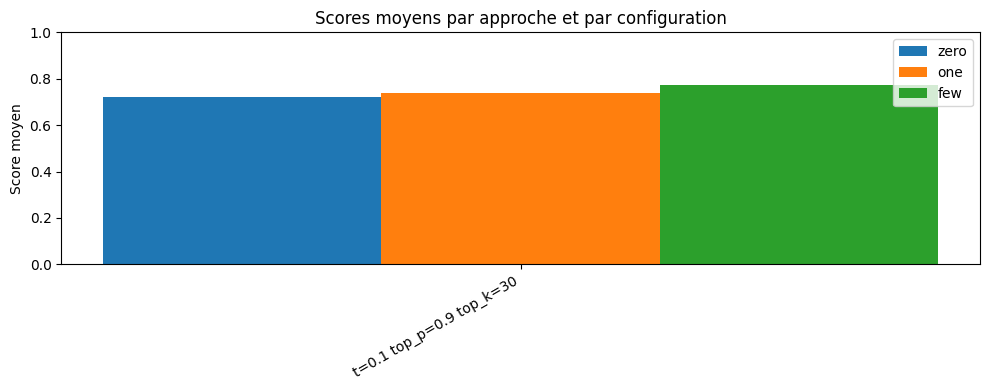

In [18]:
import matplotlib.pyplot as plt

def plot_bar_means(runs):
    approaches = ["zero","one","few"]
    labels = [r["label"] for r in runs]

    x = list(range(len(labels)))
    w = 0.25

    zero_means = [r["means"]["zero"] for r in runs]
    one_means  = [r["means"]["one"]  for r in runs]
    few_means  = [r["means"]["few"]  for r in runs]

    plt.figure(figsize=(10,4))
    plt.bar([i - w for i in x], zero_means, width=w, label="zero")
    plt.bar([i for i in x],       one_means, width=w, label="one")
    plt.bar([i + w for i in x],  few_means, width=w, label="few")

    plt.xticks(x, labels, rotation=30, ha="right")
    plt.ylim(0, 1)
    plt.ylabel("Score moyen")
    plt.title("Scores moyens par approche et par configuration")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_bar_means(RUNS)


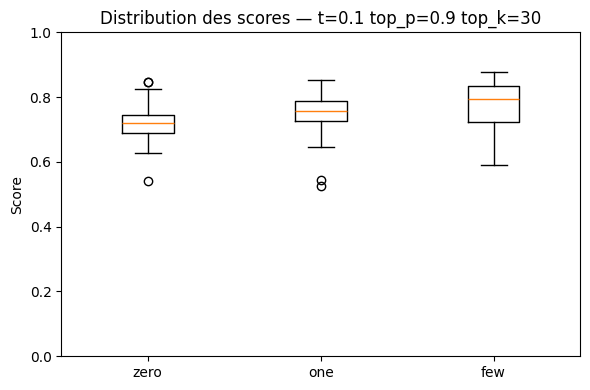

In [19]:
def plot_box_per_run(runs):
    approaches = ["zero","one","few"]
    for r in runs:
        data = [r["scores"][a] for a in approaches]

        plt.figure(figsize=(6,4))
        plt.boxplot(data, tick_labels=approaches)
        plt.ylim(0, 1)
        plt.ylabel("Score")
        plt.title(f"Distribution des scores — {r['label']}")
        plt.tight_layout()
        plt.show()

plot_box_per_run(RUNS)


## Conclusion

Ce mini-projet avait pour objectif de mettre en place un système de questions-réponses basé sur un modèle de langage, appliqué à un domaine spécifique (le cinéma), et d’évaluer automatiquement la qualité des réponses générées.

Les résultats montrent que le **choix du prompting a un impact significatif sur la qualité des réponses**. À paramètres de génération constants, l’approche **few-shot** obtient systématiquement les meilleurs scores moyens, suivie du **one-shot**, puis du **zero-shot**. Cela indique que fournir plusieurs exemples permet au modèle de mieux comprendre le format attendu et de produire des réponses plus cohérentes et pertinentes.

L’analyse des distributions de scores (boxplots) met également en évidence la **robustesse** des différentes approches. Le few-shot présente une variance plus faible et moins de valeurs aberrantes, ce qui suggère une meilleure stabilité face à la diversité des questions. À l’inverse, le one-shot peut encore produire des réponses de qualité inégale pour certaines questions.

Enfin, l’évaluation automatique basée sur la similarité sémantique et le contrôle de la longueur s’est révélée suffisante pour comparer les approches de manière objective, tout en restant simple à mettre en œuvre.

En conclusion, ce travail montre que, pour un système de questions-réponses spécialisé, **l’approche few-shot combinée à des paramètres de génération modérément stochastiques constitue le meilleur compromis entre qualité, cohérence et robustesse**. Des améliorations futures pourraient inclure une évaluation humaine ou l’ajout de métriques plus fines pour analyser la qualité des réponses.
